Kimberly Adams

Spring 2023

# Number Recognition via Neural Networks

*In this project, I will build a convolutional neural network (CNN) to classify handwritten digits from the MNIST dataset.*

In [1]:
# Import libraries
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend

2023-05-28 09:33:32.167342: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load data and target from MNIST data
(data_train, target_train), (data_test, target_test) = mnist.load_data()

*Display the first five images in the training data set. Compare these to the first five training labels.*

In [3]:
# Import tensorflow modules
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

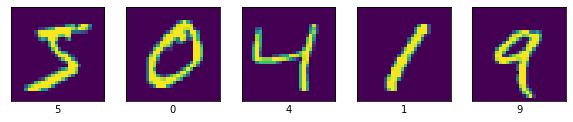

In [4]:
# Define label options
class_names = ['0','1','2','3','4','5','6','7','8','9']

# Show first 5 images with labels
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data_train[i])
    plt.xlabel(class_names[target_train[i]])
plt.show()

The first 5 images appear to properly match the numerical labels they have been assigned which is good considering this is the data we are feeding into our classification model.  If these values were already wrong then what would be the point of creating a model from them.

*Build and train a Keras CNN classifier on the MNIST training set.*

In [5]:
# Set seed
np.random.seed(0)

In [6]:
# Reshape image data into features
data_train = data_train.reshape((-1, 28, 28, 1))
data_test = data_test.reshape((-1, 28, 28, 1))

In [7]:
# View shape of training data
data_train.shape

(60000, 28, 28, 1)

In [8]:
# View shape of test data
data_test.shape

(10000, 28, 28, 1)

In [9]:
# One-hot encode target
targetH_train = np_utils.to_categorical(target_train)
targetH_test = np_utils.to_categorical(target_test)
number_of_classes = targetH_test.shape[1]

In [10]:
# View shape of training label data
targetH_train.shape

(60000, 10)

In [11]:
# Convert from integers to floats
trainX = data_train.astype('float32')
testX = data_test.astype('float32')

# Rescale pixel intensity to between 0 and 1
features_train = trainX / 255
features_test = testX / 255

In [12]:
# Start neural network sequential model
model = Sequential()

# Add convolutional layer with 64 filters, a 5x5 window, and ReLU activation function
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(28, 28, 1)))

# Add max pooling layer with a 2x2 window
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add dropout layer
model.add(Dropout(0.5))

# Add layer to flatten input
model.add(Flatten())

# Add fully connected layers with a ReLU activation function
model.add(Dense(128, activation='relu'))

# Add dropout layer
model.add(Dropout(0.5))

# Add fully connected layers with a softmax activation function
model.add(Dense(number_of_classes, activation="softmax"))

In [13]:
# Compile neural network model
model.compile(loss="categorical_crossentropy", # Cross-entropy
                optimizer="rmsprop", # Root Mean Square Propagation
                metrics=["accuracy"]) # Accuracy performance metric

In [14]:
# Fit neural network model to training data
model.fit(features_train, # Features
            targetH_train, # Target
            epochs=2, # Number of epochs
            verbose=0, # Don't print description after each epoch
            batch_size=64, # Number of observations per batch
            validation_data=(features_test, targetH_test)) # Data for evaluation

In [15]:
# Calculate and print model accuracy
_, acc = model.evaluate(features_test, targetH_test, verbose=0)
print('Accuracy Score = ', (acc*100), '%')

Accuracy Score =  98.35000038146973 %


313/313 [==============================] - 1s 3ms/step


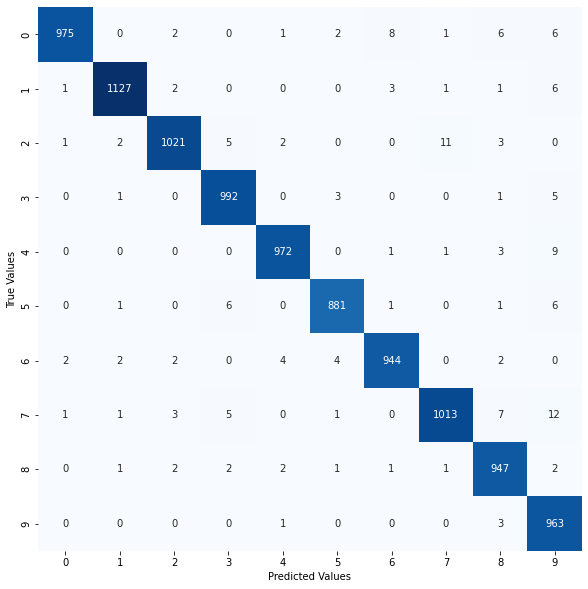

In [16]:
# Set Figure
fig = plt.figure(figsize=(10, 10))

# Calculate predicted values
y_pred = model.predict(features_test)
# Decode predictions
Y_pred = np.argmax(y_pred, 1)
# Decode labels
Y_test = np.argmax(targetH_test, 1) 

# Calculate confusion matrix on test data
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
matrix = confusion_matrix(Y_test, Y_pred)

# Plot confusion matrix
sns.heatmap(matrix.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

Both the accuracy score of 98.4% and the confusion matrix with the highest error of 12 show that this model is quite good at classifying the MNIST data. There are very few erroneously classified values with the greatest confusion occuring between numbers 2 and 7 and 9 and 7.